<a href="https://colab.research.google.com/github/syaifuddinzuhri/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1nGskruGp1bNU0llrM2GY5CgaKHG_lQco" width="100" />
<img src="https://drive.google.com/uc?export=view&id=1itnR7dy-nsjeEeUZI-kYF9B6HYwmf7tt" width="75" />

# **LAPORAN MODUL 3 - PENGOLAHAN CITRA DAN VISI KOMPUTER**


---


**Nama : Mochammad Syaifuddin Zuhri**

**NIM : 1941720013**

**Kelas : TI-3C**

**No. Absen : 12**

---

# **PRAKTIKUM**

1. Buka https://colab.research.google.com/, pilih tab Github dan pastikan repository yang terpilih ada repository yang sama dengan praktikum pada minggu pertama dan kedua.

2. Akses folder images pada Google Drive Anda dengan kode berikut:

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import numpy as np

3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan transformasi linier brightness adalah sebagai berikut:
𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏
dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google colab:

# TRANSFORMASI LINIER BRIGHTNESS

Mengubah tingkat kecerahan citra
--------------------------------


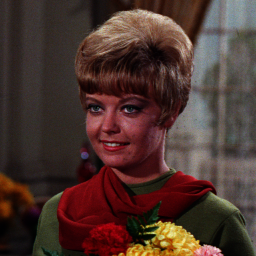

In [25]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/week_3/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM

1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kontras dan kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255] : 60
Masukkan kontras [1.0 - 3.0] : 1.5


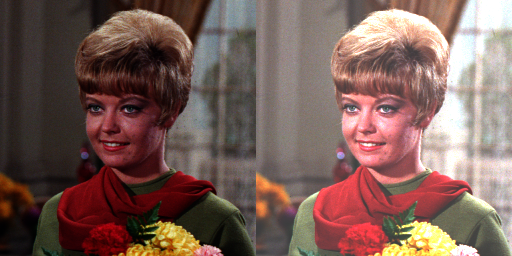

In [52]:
print('Mengubah tingkat kontras dan kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255] : '))
except ValueError:
  print('Error, not a number')

try:
  contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/week_3/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 40


Text(0.5, 1.0, 'After')

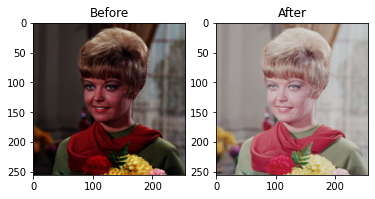

In [82]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/week_3/female.tiff')
rgb_original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(rgb_original))
log_image = brightness * (np.log(rgb_original + 1))
   
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)
   
# Display both images
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(rgb_original)
ax.set_title('Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(log_image)
ax.set_title('After')

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Text(0.5, 1.0, '[Luminance] After')

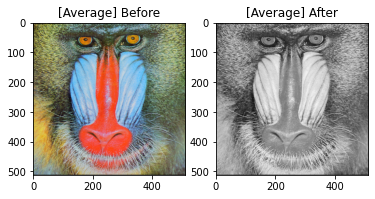

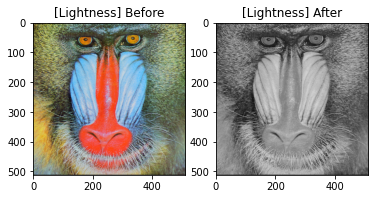

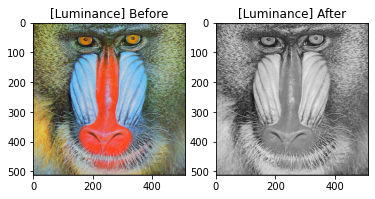

In [69]:
original = cv.imread('/content/drive/MyDrive/PCVK/week_3/mandrill.tiff')
fix_img = cv.cvtColor(original, cv.COLOR_BGR2RGB)
R, G, B = fix_img[:,:,0], fix_img[:,:,1], fix_img[:,:,2]

# Average
gc_average_img = np.mean(fix_img, axis=2)

# Lightness
gc_lightness_img = cv.cvtColor(original, cv.COLOR_BGR2RGB);
gc_lightness_img[:] = np.max(fix_img,axis=-1,keepdims=1)/2 + np.min(fix_img,axis=-1,keepdims=1)/2

# Luminance
gc_luminance_img = 0.2989 * R + 0.5870 * G + 0.1140 * B

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_img)
ax.set_title('[Average] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_average_img, cmap='gray')
ax.set_title('[Average] After')

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_img)
ax.set_title('[Lightness] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_lightness_img, cmap='gray')
ax.set_title('[Lightness] After')

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_img)
ax.set_title('[Luminance] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_luminance_img, cmap='gray')
ax.set_title('[Luminance] After')

4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna merah menjadi grayscale seperti pada contoh berikut: